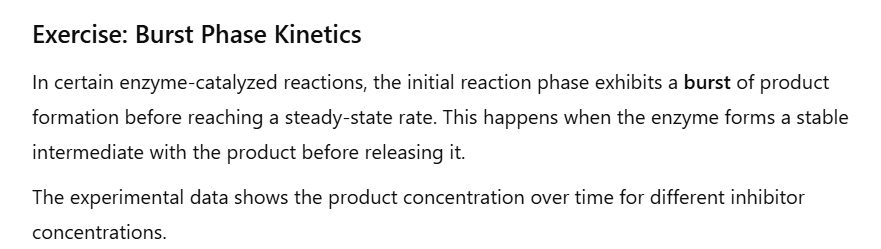
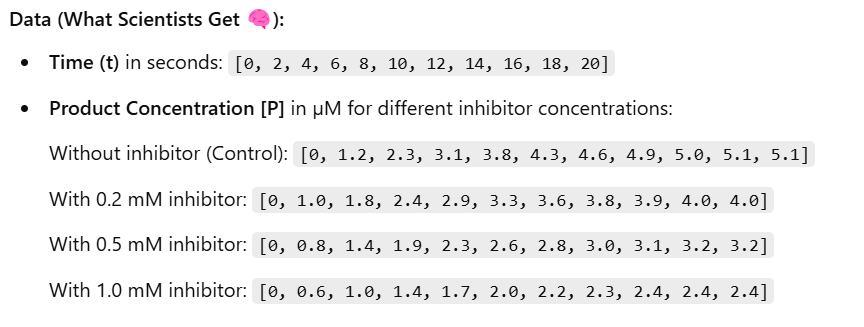
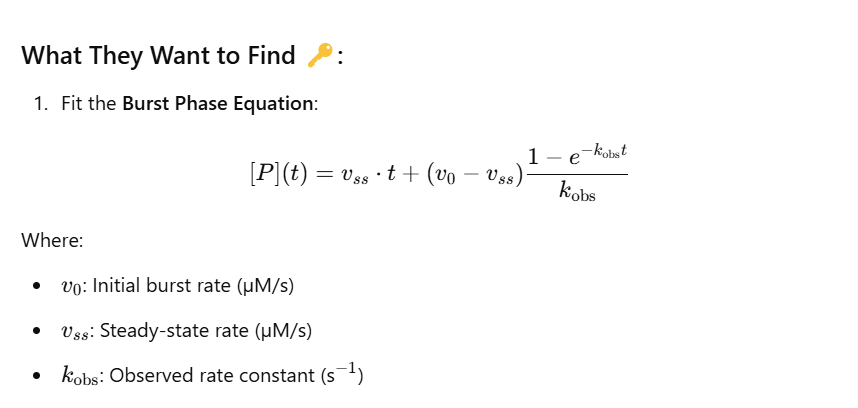
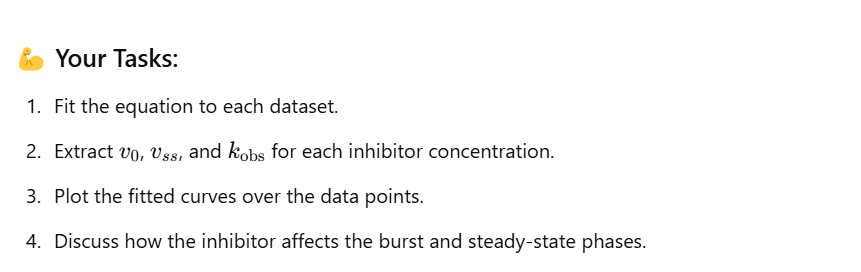

In [46]:
import numpy as np
# Dữ liệu
t = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) # s
P_control = np.array([0, 1.5, 2.7, 3.6, 4.3, 4.8, 5.2, 5.5, 5.6, 5.7, 5.7]) # µM
P_02 = np.array([0, 1.3, 2.3, 3.0, 3.6, 4.0, 4.3, 4.5, 4.6, 4.6, 4.6])
P_05 = np.array([0, 1.1, 1.9, 2.5, 3.0, 3.4, 3.7, 3.9, 4.0, 4.0, 4.0])
P_10 = np.array([0, 0.9, 1.6, 2.0, 2.4, 2.7, 2.9, 3.0, 3.1, 3.1, 3.1])

I = np.array([0, 0.2, 0.5, 1.0]) # mM Inhibitor


In [47]:
def func_p(t, vss,v0, kobs):
    return vss*t+(v0-vss)*(1-np.exp(-kobs*t))/kobs
all_p=[P_control, P_02, P_05, P_10]

from scipy.optimize import curve_fit
v0_list=[]
vss_list=[]
kobs_list=[]
for P in all_p:
    popt,_=curve_fit(func_p, t, P,  p0=(1,1,1), bounds=([0,0,0],[np.inf,np.inf,np.inf]))
    vss_list.append(popt[0])
    v0_list.append(popt[1])
    kobs_list.append(popt[2])
kobs_list

[np.float64(0.1489624669049951),
 np.float64(0.16213772136891103),
 np.float64(0.14830485080716874),
 np.float64(0.16428294290422213)]

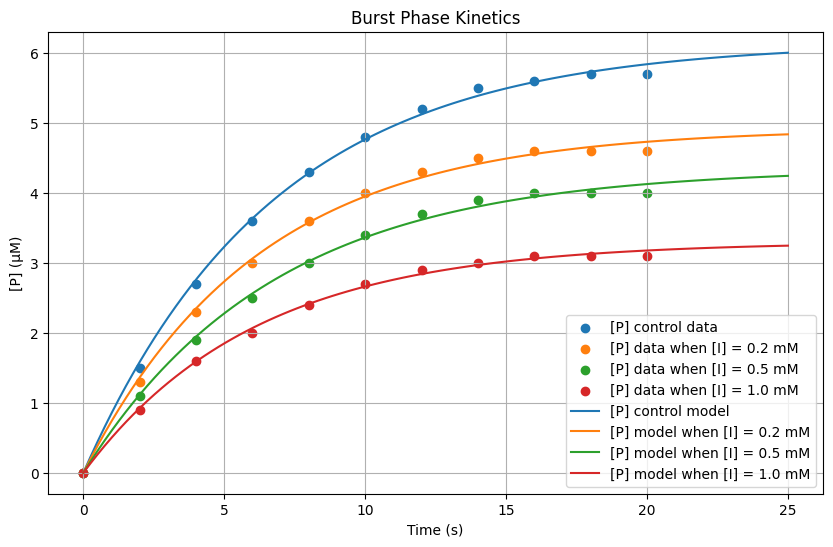

In [48]:
import matplotlib.pyplot as plt
t1 = np.linspace(0,25,100)
P00 = func_p(t1, vss_list[0], v0_list[0], kobs_list[0])
P02 = func_p(t1, vss_list[1], v0_list[1], kobs_list[1])
P05 = func_p(t1, vss_list[2], v0_list[2], kobs_list[2])
P10 = func_p(t1, vss_list[3], v0_list[3], kobs_list[3])

plt.figure(figsize=(10,6))
plt.scatter(t,P_control, label='[P] control data')
plt.scatter(t,P_02, label='[P] data when [I] = 0.2 mM')
plt.scatter(t,P_05, label='[P] data when [I] = 0.5 mM')
plt.scatter(t,P_10, label='[P] data when [I] = 1.0 mM')
plt.plot(t1,P00, label='[P] control model')
plt.plot(t1,P02, label='[P] model when [I] = 0.2 mM')
plt.plot(t1,P05, label='[P] model when [I] = 0.5 mM')
plt.plot(t1,P10, label='[P] model when [I] = 1.0 mM')
plt.title('Burst Phase Kinetics')
plt.ylabel('[P] (µM)')
plt.xlabel('Time (s)')
plt.grid(True)
plt.legend();

**Key observations**:
- the presence of I reduces the amount of products
- The higher the [I], the lower the [P]